In [1]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt


In [2]:
def load_image(image_path):
    """
    Load an image from a file and return it as a numpy array.
    The images should be in RGB.

    :param image_path: The path to the image file.
    """
    image = cv.imread(image_path)
    image = cv.cvtColor(image, cv.COLOR_BGR2RGB)
    if(image is None):
        raise FileNotFoundError("Image not found")
    return image


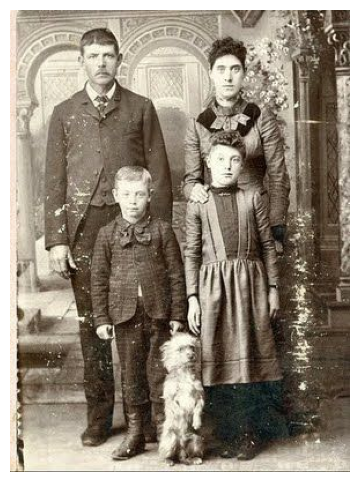

In [3]:
image1 = load_image("photos/kaggle archive/old_photo_05.jpg")


# Display the image using Matplotlib
plt.figure(figsize=(6, 6))  # Set figure size
plt.imshow(image1)       # Show the RGB image
plt.axis("off")             # Turn off the axis
plt.show()

In [4]:
def zero_padding(image, kernel_size):
    """
    Apply zero padding to an RGB image without using np.zeros.
    
    :param image: The original RGB image as a NumPy array (H x W x 3).
    :param kernel_size: The size of the kernel (must be odd).
    :return: The padded RGB image as a manually created NumPy array.
    """
    # Compute padding size
    padding_size = kernel_size // 2
    
    # Get original image dimensions
    original_height, original_width, channels = image.shape
    
    # Create the padded image manually
    padded_height = original_height + 2 * padding_size
    padded_width = original_width + 2 * padding_size
    
    # Initialize the padded image with zeros
    padded_image = [[[0 for _ in range(channels)] for _ in range(padded_width)] for _ in range(padded_height)]
    
    # Copy the original image into the center of the padded image
    for c in range(channels):
        for i in range(original_height):
            for j in range(original_width):
                padded_image[i + padding_size][j + padding_size][c] = image[i][j][c]
    
    # Convert back to a NumPy array
    return np.array(padded_image, dtype=image.dtype)

def compute_median(region):
    """
    Compute the median of a flattened region manually.
    
    :param region: The flattened region of interest.
    :return: The median value.
    """
    sorted_region = sorted(region)
    mid = len(sorted_region) // 2
    if len(sorted_region) % 2 == 0:
        # Average of two middle values for even-length list
        median = (sorted_region[mid - 1] + sorted_region[mid]) // 2
    else:
        # Middle value for odd-length list
        median = sorted_region[mid]
    return median


def median_filter(image, kernel_size=5):
    """
    Apply a median filter to the image.

    :param image: The input image as a NumPy array.
    :param kernel_size: The size of the kernel.
    :return: The filtered image.
    """
    pad_size = kernel_size // 2
    padded_image = zero_padding(image, kernel_size)
    height, width, channels = image.shape

    # Initialize an empty filtered image
    filtered_image = [[[0] * channels for _ in range(width)] for _ in range(height)]

    for c in range(channels):  # Iterate over color channels
        for i in range(height):  # Iterate over rows
            for j in range(width):  # Iterate over columns
                # Extract the region of interest
                region = padded_image[i:i + kernel_size, j:j + kernel_size, c].flatten()
                # Compute the median manually
                filtered_image[i][j][c] = compute_median(region)

    return np.array(filtered_image, dtype=image.dtype)
        

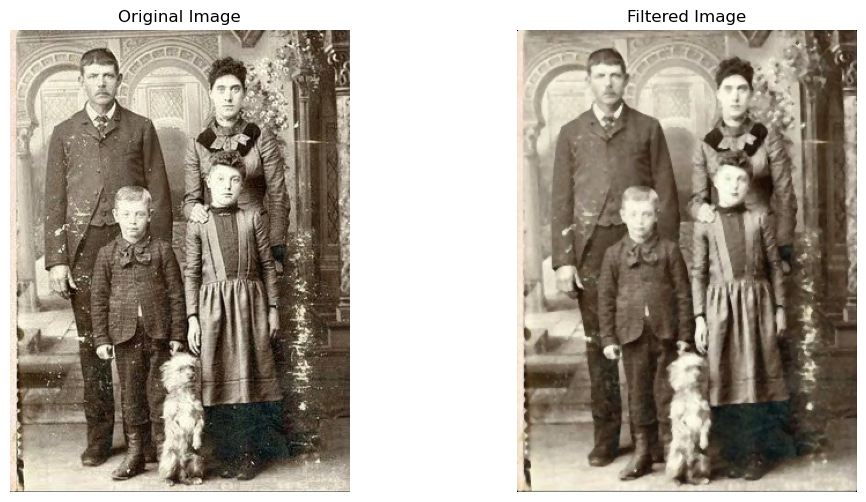

In [5]:
# apply the median filter to the image and compute the filtered image
filtered_image = median_filter(image1, 3)

# Display the original and filtered images
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(image1)
plt.title("Original Image")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(filtered_image)
plt.title("Filtered Image")
plt.axis("off")
plt.show()



Text(0.5, 1.0, 'OpenCV median filter')

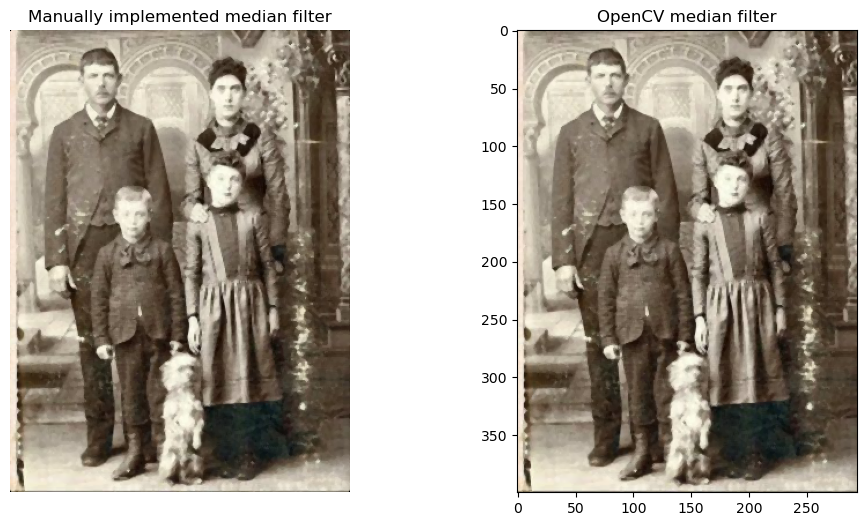

In [6]:
# Now I want you to apply the median filter with opencv function
median_output_image = cv.medianBlur(image1, 3)

plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(filtered_image)
plt.title("Manually implemented median filter")
plt.axis("off")
plt.subplot(1, 2, 2)
plt.imshow(median_output_image)
plt.title("OpenCV median filter")
